# Gaussian Naive Bayes

In [42]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        pass
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        self.X_meus = []
        self.X_stds = []
        
        num_y0 = np.sum(y==0)
        num_y1 = np.sum(y==1)
        self.p_y = num_y1 / len(y)

        self.X_meus.append(X[y==0].mean(axis=0))
        self.X_meus.append(X[y==1].mean(axis=0))
        self.X_meus = np.array(self.X_meus).T
        
        self.X_stds.append(X[y==0].std(axis=0))
        self.X_stds.append(X[y==1].std(axis=0))
        self.X_stds = np.array(self.X_stds).T
        
        self.m = self.X_stds.shape[0]
    
    def predict(self, instances):
        preds = []
        for instance in instances:
            prob0 = 1.0
            prob1 = 1.0
            for i in range(len(instance)):
                prob0 *= self.gaussian_pdf(self.X_meus[i, 0], self.X_stds[i, 0], instance[i])
                prob1 *= self.gaussian_pdf(self.X_meus[i, 1], self.X_stds[i, 1], instance[i])
            prob0 *= (1 - self.p_y)
            prob1 *= self.p_y
            preds.append(int(prob1 > prob0))
        return np.array(preds)

    def gaussian_pdf(self, meu, sigma, x):
        return (
            1.0 / (np.sqrt(2 * np.pi) * sigma)
            * np.exp(-0.5 * ((x - meu) / sigma) ** 2)
        )

    def generate(self, n=1, y=None):
        def unconditional_sample():
            # draw from p(y)
            y_samples = np.random.binomial(1, self.p_y, n)

            # draw from p(x | y) 
            x_samples = [conditional_sample(y_samples[i], 1)[0] for i in range(n)]
            return np.array(x_samples), y_samples

        def conditional_sample(y, n):
            x_samples = []
            for i in range(n):
                x_i = []
                for j in range(self.m):
                    meu = self.X_meus[j, y]
                    std = self.X_stds[j, y]
                    x_i.append(np.random.normal(meu, std))
                x_samples.append(x_i)
            return np.array(x_samples)

        return (conditional_sample(y, n), np.full((n,), y)) if y is not None else unconditional_sample()

In [43]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split(binary_features=False)

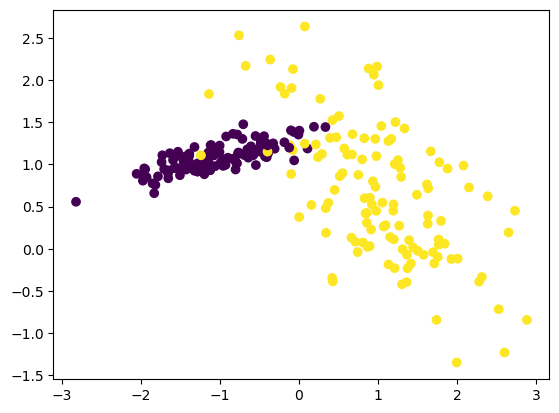

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [45]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [46]:
from helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.95, 'precision': 0.9375, 'recall': 0.967741935483871}

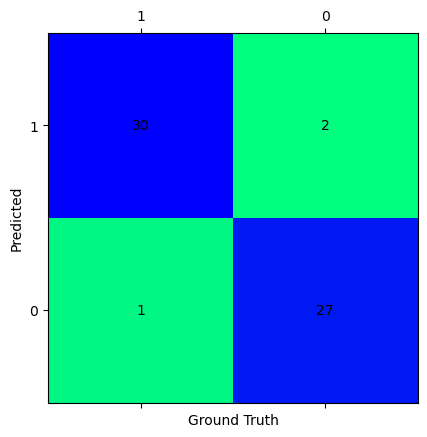

In [47]:
from helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)

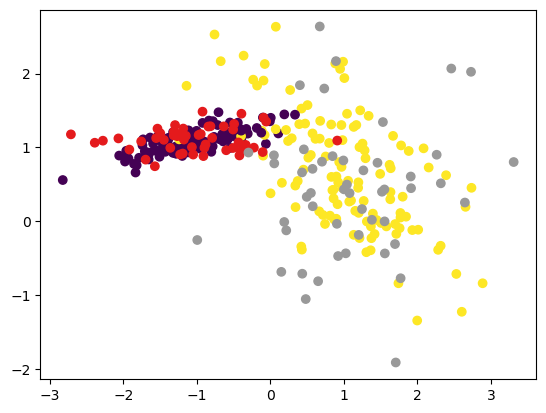

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

X_gen, y_gen = model.generate(n=100)
plt.scatter(X_gen[:,0], X_gen[:,1], c=y_gen, cmap="Set1")